In [2]:
import tensorflow as tf
tf.random.set_seed(123)
import glob
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
paths = glob.glob('.\\data\\*')
dict_path_classes = {f"{idx}":path.split('\\')[-1] for idx, path in enumerate(paths)}
dict_path_classes

{'0': 'Mild_Demented',
 '1': 'Moderate_Demented',
 '2': 'Non_Demented',
 '3': 'Very_Mild_Demented'}

In [4]:
X = []
y = []
for key, value in dict_path_classes.items():
    print(key, value)
    for path in glob.glob(f'.\\data\\{value}\\*.jpg'):
        img = plt.imread(path)
        X.append(img.reshape(128,128,1))
        y.append(key)

0 Mild_Demented
1 Moderate_Demented
2 Non_Demented
3 Very_Mild_Demented


In [5]:
dfy = pd.DataFrame(data=y, columns=["labels"])
dfy.value_counts()

labels
2         3200
3         2240
0          896
1           64
Name: count, dtype: int64

In [4]:
X = np.array(X)
y = np.array(y)

In [15]:
X_PCA=pd.DataFrame(np.array([i.reshape(128,128).flatten() for i in X]))

In [37]:
projections = PCA(3,random_state=123).fit_transform(X_PCA)

In [41]:
df_projections = pd.DataFrame(data=projections, columns=[f'x{i}' for i in range(1,4)])
df_projections

,x1,x2,x3
0,3189.331710,1115.094249,190.914037
1,3016.047018,433.588154,379.615476
2,3712.137280,-930.395994,1585.156292
3,3407.726277,-1676.888600,1268.490975
4,3326.014616,1147.149572,1820.782440
...,...,...,...
6395,-2736.844356,-724.539704,-115.871220
6396,-2350.664192,-1152.603625,321.430454
6397,-2520.322113,-1522.065152,-642.202712
6398,-2007.154052,624.855286,1943.445892


In [42]:
df_projections['label'] = y_b
df_projections

,x1,x2,x3,label
0,3189.331710,1115.094249,190.914037,1
1,3016.047018,433.588154,379.615476,1
2,3712.137280,-930.395994,1585.156292,1
3,3407.726277,-1676.888600,1268.490975,1
4,3326.014616,1147.149572,1820.782440,1
...,...,...,...,...
6395,-2736.844356,-724.539704,-115.871220,1
6396,-2350.664192,-1152.603625,321.430454,1
6397,-2520.322113,-1522.065152,-642.202712,1
6398,-2007.154052,624.855286,1943.445892,1


<Axes: >

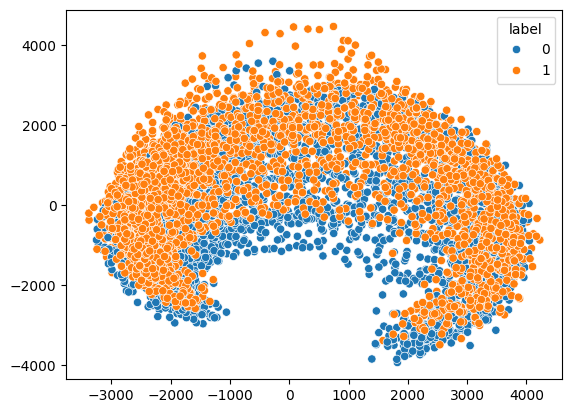

In [43]:
sns.scatterplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

<Axes: >

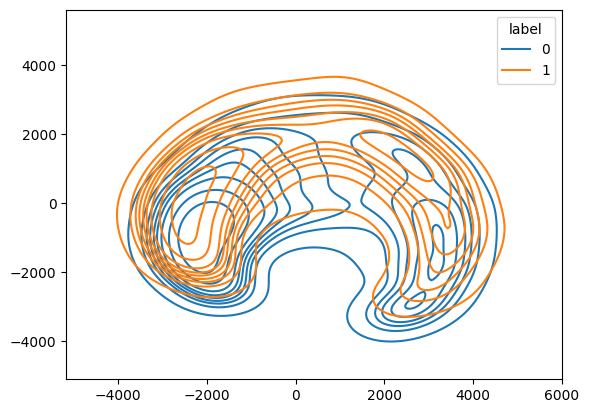

In [44]:
sns.kdeplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

In [5]:
def create_dataset_b():
    y_b = []
    for label in y:
        if label in ["0","1", "3"]:
            y_b.append(1)
        else:
            y_b.append(0)
    return np.array(y_b)

In [6]:
y_b = create_dataset_b()
y_b.shape

(6400,)

In [7]:
df1 = pd.DataFrame(data=y_b, columns=["labels"])
df1.value_counts()

labels
0         3200
1         3200
Name: count, dtype: int64

In [8]:
model = tf.keras.models.load_model("cnn_model/best_model.h5", compile=False)
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('MLP_3').output)

In [9]:
BATCH_SIZE = 12

ds = tf.data.Dataset.from_tensor_slices(tensors=(X, y_b))
ds = ds.shuffle(buffer_size = len(y_b), seed=123).batch(batch_size=BATCH_SIZE)

In [12]:
DB1 = intermediate_layer_model.predict(ds)

  1/534 [..............................] - ETA: 14s

534/534 [==============================] - 2s 4ms/step


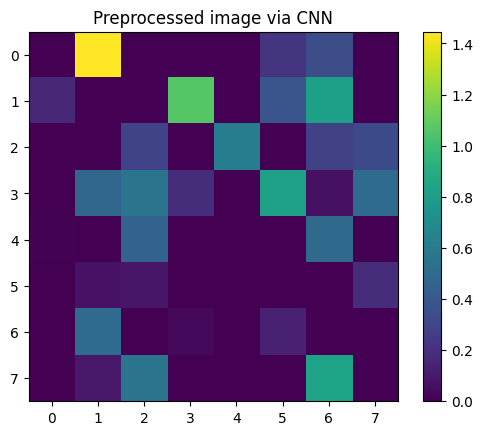

In [58]:
plt.imshow(DB1[0].reshape(8,8), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Preprocessed image via CNN")
plt.show()

In [13]:
DB1.shape

(6400, 64)

In [16]:
DB2=PCA(120,random_state=123).fit_transform(X_PCA)

In [17]:
DB3=pd.DataFrame(np.hstack([DB1,DB2]))
DB3

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.000000,1.446085,0.000000,0.000000,0.000000,0.220005,0.340053,0.000000,0.165161,0.000000,...,16.418521,-26.545927,-313.019964,-62.398341,-171.976458,5.179411,-167.943635,280.171491,86.169590,-20.975314
1,1.363026,0.000000,0.000000,0.000000,2.526590,0.000000,1.761688,0.000000,0.000000,2.488903,...,-56.953287,-163.102576,87.841717,266.236128,168.150606,-189.236477,139.686717,31.534217,76.940799,-163.133223
2,0.000000,2.960914,3.936674,0.000000,0.000000,0.375904,0.932000,1.943815,0.000000,0.000000,...,261.611099,63.945031,-67.488780,40.346983,-298.128150,-79.484372,82.347982,-91.118446,80.662067,-61.796165
3,0.328585,0.000000,0.000000,0.000000,2.199944,0.000000,0.989349,0.000000,0.000000,2.020577,...,168.998549,-64.085660,-44.175040,-71.673662,59.926607,-219.319901,-83.815067,53.838871,45.400737,-166.733796
4,0.695786,0.828800,0.000000,0.008905,0.251951,0.000000,0.884143,0.846976,0.000000,0.882307,...,-118.350422,40.809465,293.364044,-16.166208,-434.505139,-161.029784,-82.443938,306.987638,-84.237931,46.921116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.218643,0.311750,0.153332,0.000000,0.000000,0.000000,0.536161,0.384919,0.000000,0.000000,...,213.694386,-53.654604,26.212131,-254.429311,228.626998,88.555920,178.670648,-293.211202,-36.189756,-244.476480
6396,0.000000,3.959794,4.290563,0.000000,0.000000,0.611869,0.461825,2.187307,0.000000,0.000000,...,488.011504,-27.235276,-34.970971,-177.232789,-107.556041,98.606397,-245.437705,144.912033,-53.246151,-110.806509
6397,0.000000,3.372554,3.248134,0.000000,0.000000,0.511671,0.584862,1.119557,0.183879,0.000000,...,-365.926588,-64.109221,-166.542308,89.235854,160.174382,260.136625,153.683672,-3.190700,97.441249,-247.922596
6398,0.000000,5.846646,3.079955,0.000000,0.000000,0.000000,0.643220,0.000000,0.000000,0.000000,...,51.479249,47.600027,14.716997,-188.281636,40.841524,20.996657,238.690987,-132.720025,168.599356,167.001016


In [24]:
svm_model = SVC(random_state=123)
xb_model = XGBClassifier(random_state=123)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [30]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(DB3,y_b, random_state=123, test_size=0.2)

## SVM

In [32]:
svm_model.fit(X_train_,y_train_)
print(classification_report(y_test_,svm_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       639
           1       0.95      0.93      0.94       641

    accuracy                           0.94      1280
   macro avg       0.94      0.94      0.94      1280
weighted avg       0.94      0.94      0.94      1280



## XB

In [36]:
xb_model.fit(X_train_,y_train_)
print(classification_report(y_test_,xb_model.predict(X_test_)))

c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       639
           1       0.97      0.97      0.97       641

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

In [34]:
knn_model.fit(X_train_,y_train_)
print(classification_report(y_test_,knn_model.predict(X_test_)))

Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       639
           1       0.98      0.95      0.96       641

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lab6k\AppData\Local\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [35]:
nb_model.fit(X_train_,y_train_)
print(classification_report(y_test_,nb_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       639
           1       0.69      0.68      0.69       641

    accuracy                           0.69      1280
   macro avg       0.69      0.69      0.69      1280
weighted avg       0.69      0.69      0.69      1280

